In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
BatchSize=32
ImageSize=256
Channel=3
Epochs=30

In [ ]:
import tensorflow as tf

# Update the path to your dataset
directory = '/content/drive/MyDrive/Colab Notebooks/potato'

# Create a dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    image_size=(ImageSize, ImageSize),  # Resize images to 256x256
    batch_size=BatchSize          # Number of images to return in each batch
)

# # Display the first batch of images and labels
# for images, labels in dataset.take(1):
#     print(images.shape, labels.shape)


Found 3977 files belonging to 3 classes.


In [ ]:
class_name=dataset.class_names

(32, 256, 256, 3)
[2 1 0 2 2 0 0 1 0 0 0 0 1 1 1 2 0 2 0 0 1 1 0 1 2 2 1 1 0 2 2 2]


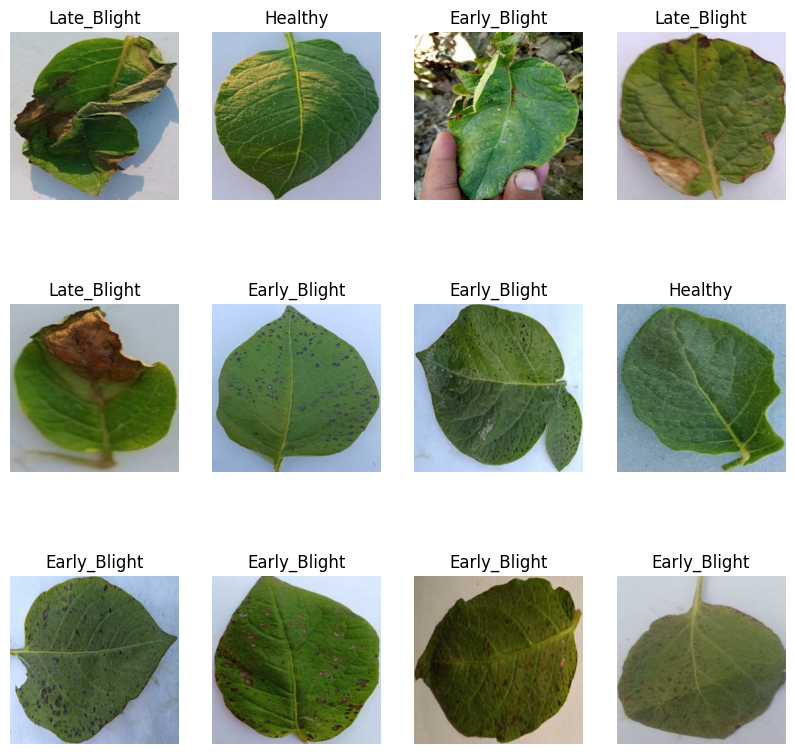

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")


In [ ]:
train_size=0.8
len(dataset)*train_size

100.0

In [ ]:
train_ds=dataset.take(98)

In [ ]:
len(train_ds)

98

In [ ]:
test_ds=dataset.skip(98)

In [ ]:
len(test_ds)

27

In [ ]:
val_size=0.1
len(dataset)*val_size

12.5

In [ ]:
val_ds=test_ds.take(12)
len(val_ds)

12

In [ ]:
test_ds=test_ds.skip(12)
len(test_ds)

15

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+val_split+test_split)==1

    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

100

In [ ]:
len(val_ds)

12

In [ ]:
len(test_ds)

13

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)


[[[0.84705883 0.90588236 0.99607843]
  [0.84705883 0.90588236 0.99607843]
  [0.84705883 0.90588236 0.99607843]
  ...
  [0.83137256 0.8862745  0.99215686]
  [0.83137256 0.8862745  0.99215686]
  [0.83137256 0.8862745  0.99215686]]

 [[0.84705883 0.90588236 0.99607843]
  [0.84705883 0.90588236 0.99607843]
  [0.84705883 0.90588236 0.99607843]
  ...
  [0.827451   0.88235295 0.9882353 ]
  [0.827451   0.88235295 0.9882353 ]
  [0.827451   0.88235295 0.9882353 ]]

 [[0.84705883 0.90588236 0.99607843]
  [0.84705883 0.90588236 0.99607843]
  [0.84705883 0.90588236 0.99607843]
  ...
  [0.827451   0.88235295 0.9882353 ]
  [0.827451   0.88235295 0.9882353 ]
  [0.827451   0.88235295 0.9882353 ]]

 ...

 [[0.64705884 0.69803923 0.83137256]
  [0.64705884 0.69803923 0.83137256]
  [0.64705884 0.69803923 0.83137256]
  ...
  [0.6627451  0.7137255  0.8392157 ]
  [0.6627451  0.7137255  0.8392157 ]
  [0.6627451  0.7137255  0.8392157 ]]

 [[0.64705884 0.69803923 0.83137256]
  [0.64705884 0.69803923 0.83137256]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)


(256, 256, 3)


In [ ]:
from tensorflow.keras import layers, Sequential

resize_and_rescale = Sequential([
    layers.Resizing(ImageSize, ImageSize),
    layers.Rescaling(1.0/255)
])


In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers, models, regularizers

In [ ]:
input_shape = (BatchSize,ImageSize,ImageSize,Channel)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),

    layers.Dropout(0.5),  # Adding Dropout layer with 50% dropout rate
    layers.Dense(64, activation='relu'),  # Fully Connected + ReLU layer
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.Activation('relu'),  # ReLU activation


    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 254, 254, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 127, 127, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 125, 125, 64)          │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,039,939 (3.97 MB)

 Trainable params: 1,039,939 (3.97 MB)

 Non-trainable params: 0 (0.00 B)

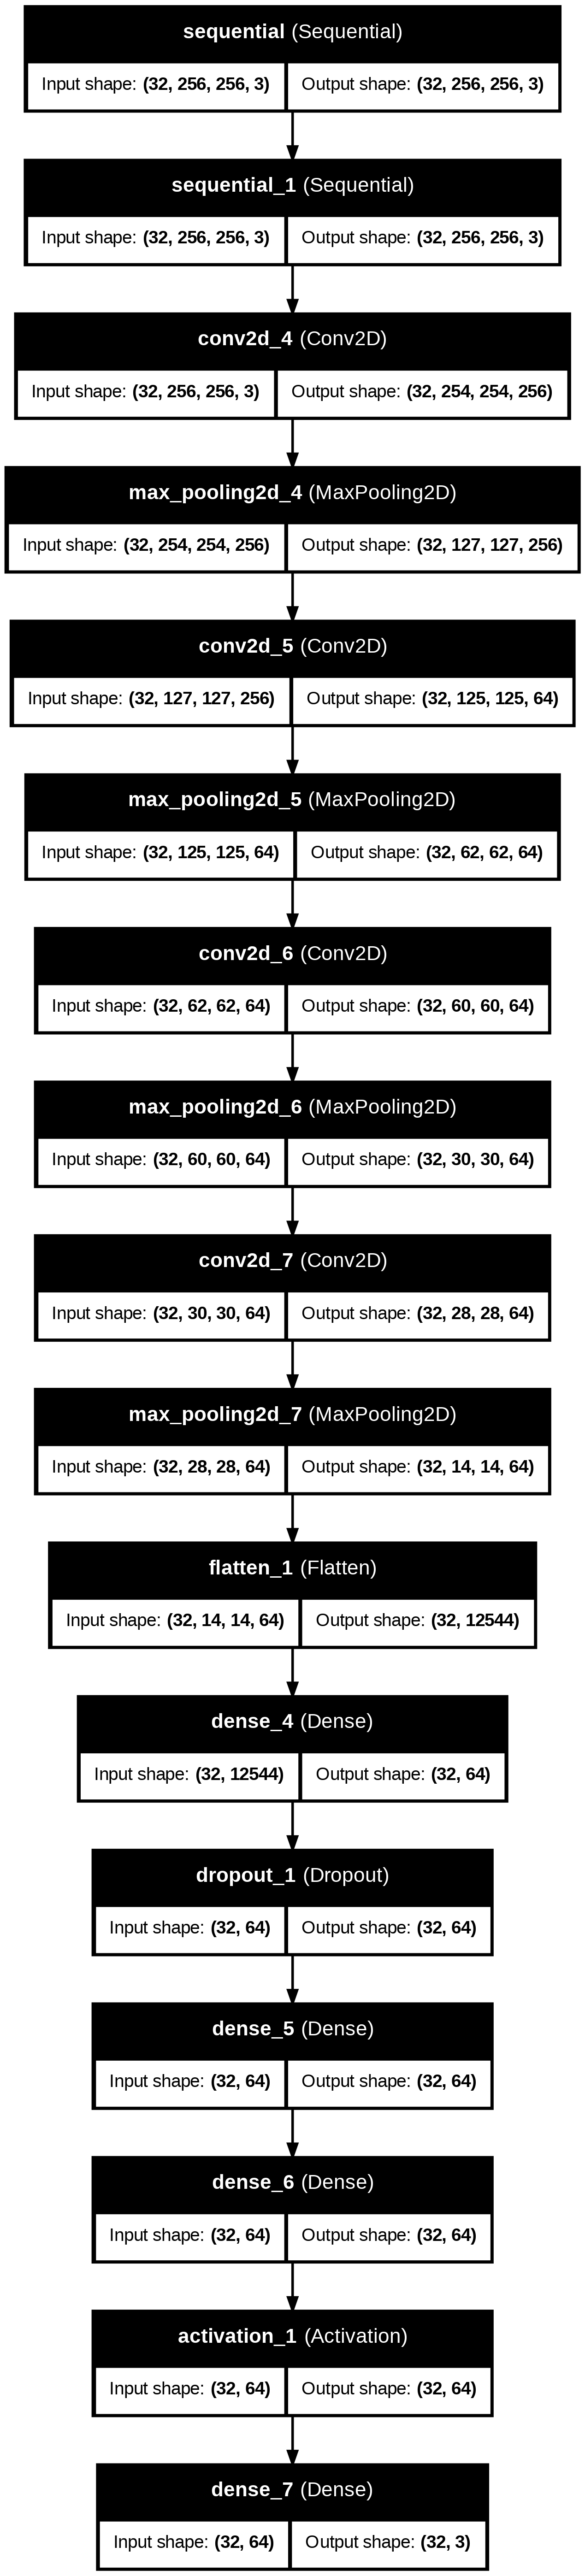

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming you have a model object
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=BatchSize,
    verbose=1,
    validation_data=val_ds
    )

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1659s 451ms/step - accuracy: 0.3661 - loss: 1.6036 - val_accuracy: 0.3490 - val_loss: 1.2925
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - accuracy: 0.3900 - loss: 1.2297 - val_accuracy: 0.5104 - val_loss: 1.0933
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.4651 - loss: 1.1047 - val_accuracy: 0.5599 - val_loss: 1.0399
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - accuracy: 0.5103 - loss: 1.0197 - val_accuracy: 0.4297 - val_loss: 1.0700
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.5132 - loss: 1.0178 - val_accuracy: 0.5000 - val_loss: 1.0025
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.5347 - loss: 0.9808 - val_accuracy: 0.5755 - val_loss: 0.9390
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - accuracy: 0.5727 - loss: 0.9226 - val_accuracy: 0.6875 - val_loss: 0.8412
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.6242 - loss:

In [ ]:
score = model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9766 - loss: 0.0811


In [ ]:
score

[0.10113424807786942, 0.963942289352417]

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 100}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
len(history.history['loss'])

30

In [ ]:
len(history.history['accuracy'])

30

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

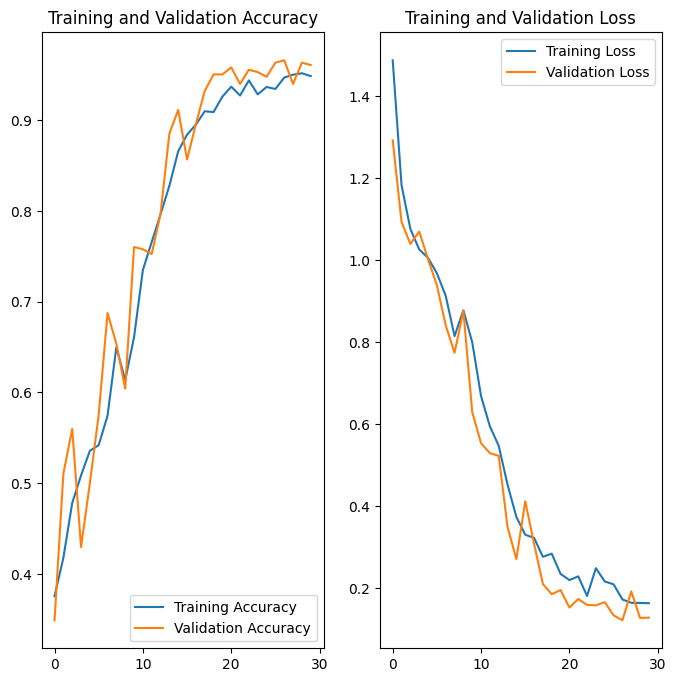

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def predict(model, img):
    img_arry = tf.expand_dims(img, 0)  # create a batch
    predictions = model.predict(img_arry)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = 100 * np.max(predictions[0])
    return predicted_class, confidence

# Assuming images, class_name, labels, and model are already defined
def display_predictions(images, labels, class_name, model):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off")
    plt.show()

# Example usage:
# display_predictions(images, labels, class_name, model)

In [ ]:
for images, label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[label[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%", fontsize=10)
        plt.axis("off")

plt.tight_layout(pad=3.0)  # Adjust spacing between subplots
plt.show()


NameError: name 'test_ds' is not defined

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/PDIUDLv2.keras')

In [ ]:
import os

save_path = '/content/drive/MyDrive/Colab Notebooks/PDIUDLv2.keras'

# Check if the file exists
if os.path.exists(save_path):
    print(f"Model saved successfully at: {save_path}")
else:
    print(f"Model save failed. File not found at: {save_path}")



Model saved successfully at: /content/drive/MyDrive/Colab Notebooks/PDIUDLv2.keras


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Define the labels for your disease classes
labels = ['Early_Blight', 'Healthy', 'Late_Blight']

def predict_disease(image):
    # Convert the uploaded image to RGB and resize it to the input size expected by the model
    image = Image.fromarray(image)
    image = image.convert('RGB')
    image = image.resize((256, 256))
    image = np.array(image)

    # Normalize the image
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict the disease
    predictions = model.predict(image)
    predicted_class = labels[np.argmax(predictions)]
    confidence_scores = {label: float(predictions[0][i]) for i, label in enumerate(labels)}

    return predicted_class, confidence_scores

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(),
    outputs=[gr.Textbox(label="Predicted Class"), gr.Label(label="Confidence Scores")],
    title="Potato Disease Identification (by: Pervez Abbas)"
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ec81c5f167d35cf585.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
